In [20]:
import matplotlib.animation as ani
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

In [2]:
d = pd.DataFrame([[0, 2, 3], [0, 4, 1], [10, 20, 30]],
                index=[4, 5, 6], columns=['A', 'B', 'C'])
# at[] Access a single value for a row/column label pair.
d.at[4, 'C']

3

In [3]:
df = pd.read_csv(url, delimiter=',')
# df_interest = df.loc[df['Country/Region']]
# filter certain countries and where states are missing
df_in = df.loc[df['Country/Region'].isin(['United Kingdom', 'US', 'Italy', 'Canada', 'Germany']) & df['Province/State'].isna()]
# rename the index as its country name
df_in.rename(
    index=lambda x: df_in.at[x, 'Country/Region'], inplace=True
)

df1 = df_in.transpose()
df1 = df1.drop(['Province/State', 'Country/Region', 'Lat', 'Long'])
# delete the rows w/ all 0s
df1 = df1.loc[(df1!=0).any(1)]
# set ind as datetime dtype
df1.index = pd.to_datetime(df1.index)
df1.tail()

C:\Users\dengj\Miniconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Germany,Italy,US,United Kingdom
2021-03-26,75828,107256,548172,126515
2021-03-27,75915,107636,548913,126573
2021-03-28,75959,107933,549420,126592
2021-03-29,76139,108350,550121,126615
2021-03-30,76389,108879,550996,126670


In [4]:
df1

,Germany,Italy,US,United Kingdom
2020-02-21,0,1,0,0
2020-02-22,0,2,0,0
2020-02-23,0,3,0,0
2020-02-24,0,7,0,0
2020-02-25,0,10,0,0
...,...,...,...,...
2021-03-26,75828,107256,548172,126515
2021-03-27,75915,107636,548913,126573
2021-03-28,75959,107933,549420,126592
2021-03-29,76139,108350,550121,126615


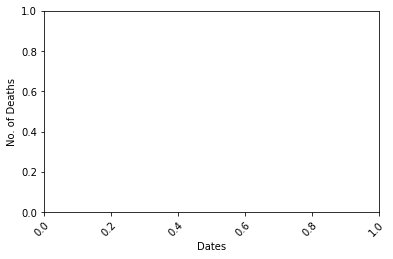

In [22]:
color = ['red', 'blue', 'tan', 'orange']

fig = plt.figure()
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.subplots_adjust(bottom=.2, top=.9)

plt.ylabel("No. of Deaths")
plt.xlabel('Dates')

def buildmebarchart(i=int):
    plt.legend(df1.columns)
    p = plt.plot(df1[:i].index, df1[:i].values)
    for i in range(4):
        p[i].set_color(color[i])
        
        
animator = ani.FuncAnimation(fig, buildmebarchart, interval=100)
# fig: The figure object used to get needed events, such as draw or resize.
# interval : int, default: 200
#     Delay between frames in milliseconds.

# animator
plt.show()

# DONT KNOW WHY ITS not working at all :/

In [18]:
df1[:1]

,Germany,Italy,US,United Kingdom
2020-02-21,0,1,0,0


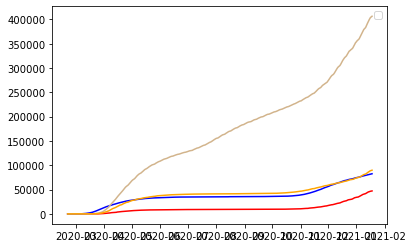

In [16]:
buildmebarchart(333)

In [7]:
%pwd

'C:\\Users\\dengj\\ubc_mds_21\\treasurehunt\\pandas_'

MovieWriter ffmpeg unavailable; using Pillow instead.


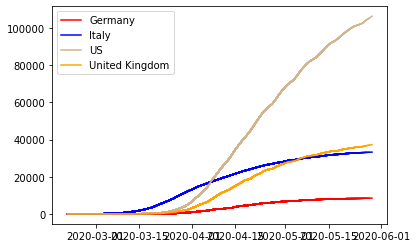

In [8]:
animator.save("C:\\Users\\dengj\\ubc_mds_21\\treasurehunt\\pandas_\\myfirstani.gif")

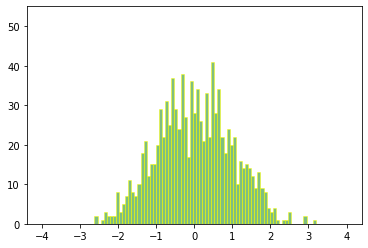

In [9]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)
# Fixing bin edges
HIST_BINS = np.linspace(-4, 4, 100)

# histogram our data with numpy
data = np.random.randn(1000)
n, _ = np.histogram(data, HIST_BINS)

def prepare_animation(bar_container):

    def animate(frame_number):
        # simulate new data coming in
        data = np.random.randn(1000)
        n, _ = np.histogram(data, HIST_BINS)
        for count, rect in zip(n, bar_container.patches):
            rect.set_height(count)
        return bar_container.patches
    return animate

fig, ax = plt.subplots()
_, _, bar_container = ax.hist(data, HIST_BINS, lw=1,
                              ec="yellow", fc="green", alpha=0.5)
ax.set_ylim(top=55)  # set safe limit to ensure that all data is visible.

ani = animation.FuncAnimation(fig, prepare_animation(bar_container), 50,
                              repeat=False, blit=True)
plt.show()